# Analisis estadistico

## Importación de variables

In [1]:
import pandas as pd



taxi_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-02.parquet')
taxi_may= pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-04.parquet')

## Test de hipotesis

In [2]:
import pandas as pd
from scipy.stats import ttest_ind


def test(fecha1,fecha2):

    numeric_df_feb = taxi_feb.select_dtypes(include='number')
    numeric_df_may = taxi_may.select_dtypes(include='number')

    for variable in numeric_df_feb.columns:
        if variable in numeric_df_may.columns:
         
            data_feb = numeric_df_feb[variable].dropna()
            data_may = numeric_df_may[variable].dropna()

            t_stat, p_value = ttest_ind(data_feb, data_may)



            if p_value < 0.05:
                print(f"Rechazamos la hipótesis nula para la variable o campo {variable} su p valor = {p_value} <0.05: Las medias son significativamente diferentes.")
            else:
                print(f"No rechazamos la hipótesis nula para la variable o campo {variable} su p valor = {p_value} >0.05: No hay evidencia suficiente para decir que las medias son diferentes.")
        else:
            print(f'La variable {variable} no se encuentra en ambos DataFrames.')

In [3]:
test(taxi_feb,taxi_may)

Rechazamos la hipótesis nula para la variable o campo VendorID su p valor = 0.0 <0.05: Las medias son significativamente diferentes.
Rechazamos la hipótesis nula para la variable o campo passenger_count su p valor = 0.0 <0.05: Las medias son significativamente diferentes.
Rechazamos la hipótesis nula para la variable o campo trip_distance su p valor = 2.56751112902721e-16 <0.05: Las medias son significativamente diferentes.
Rechazamos la hipótesis nula para la variable o campo RatecodeID su p valor = 1.0427896655171654e-37 <0.05: Las medias son significativamente diferentes.
Rechazamos la hipótesis nula para la variable o campo PULocationID su p valor = 0.0 <0.05: Las medias son significativamente diferentes.
Rechazamos la hipótesis nula para la variable o campo DOLocationID su p valor = 0.0 <0.05: Las medias son significativamente diferentes.
Rechazamos la hipótesis nula para la variable o campo payment_type su p valor = 0.0 <0.05: Las medias son significativamente diferentes.
Rechaza

## Estadistica descriptiva

In [4]:
desc_feb = taxi_feb.describe()
desc_may = taxi_may.describe()
desc_feb,desc_may

(           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
 count  6.299367e+06                     6299367                     6299367   
 mean   1.673616e+00  2020-02-15 17:07:47.789266  2020-02-15 17:23:55.531851   
 min    1.000000e+00         2008-12-31 22:20:23         2008-12-31 22:55:19   
 25%    1.000000e+00  2020-02-08 04:46:57.500000         2020-02-08 05:18:01   
 50%    2.000000e+00         2020-02-15 07:17:55         2020-02-15 07:39:47   
 75%    2.000000e+00         2020-02-22 23:46:54         2020-02-23 00:02:15   
 max    6.000000e+00         2020-07-11 12:57:52         2020-07-11 12:59:24   
 std    4.692367e-01                         NaN                         NaN   
 
        passenger_count  trip_distance    RatecodeID  PULocationID  \
 count     6.250533e+06   6.299367e+06  6.250533e+06  6.299367e+06   
 mean      1.504449e+00   2.864533e+00  1.055871e+00  1.646020e+02   
 min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00  

## Visualizaciones

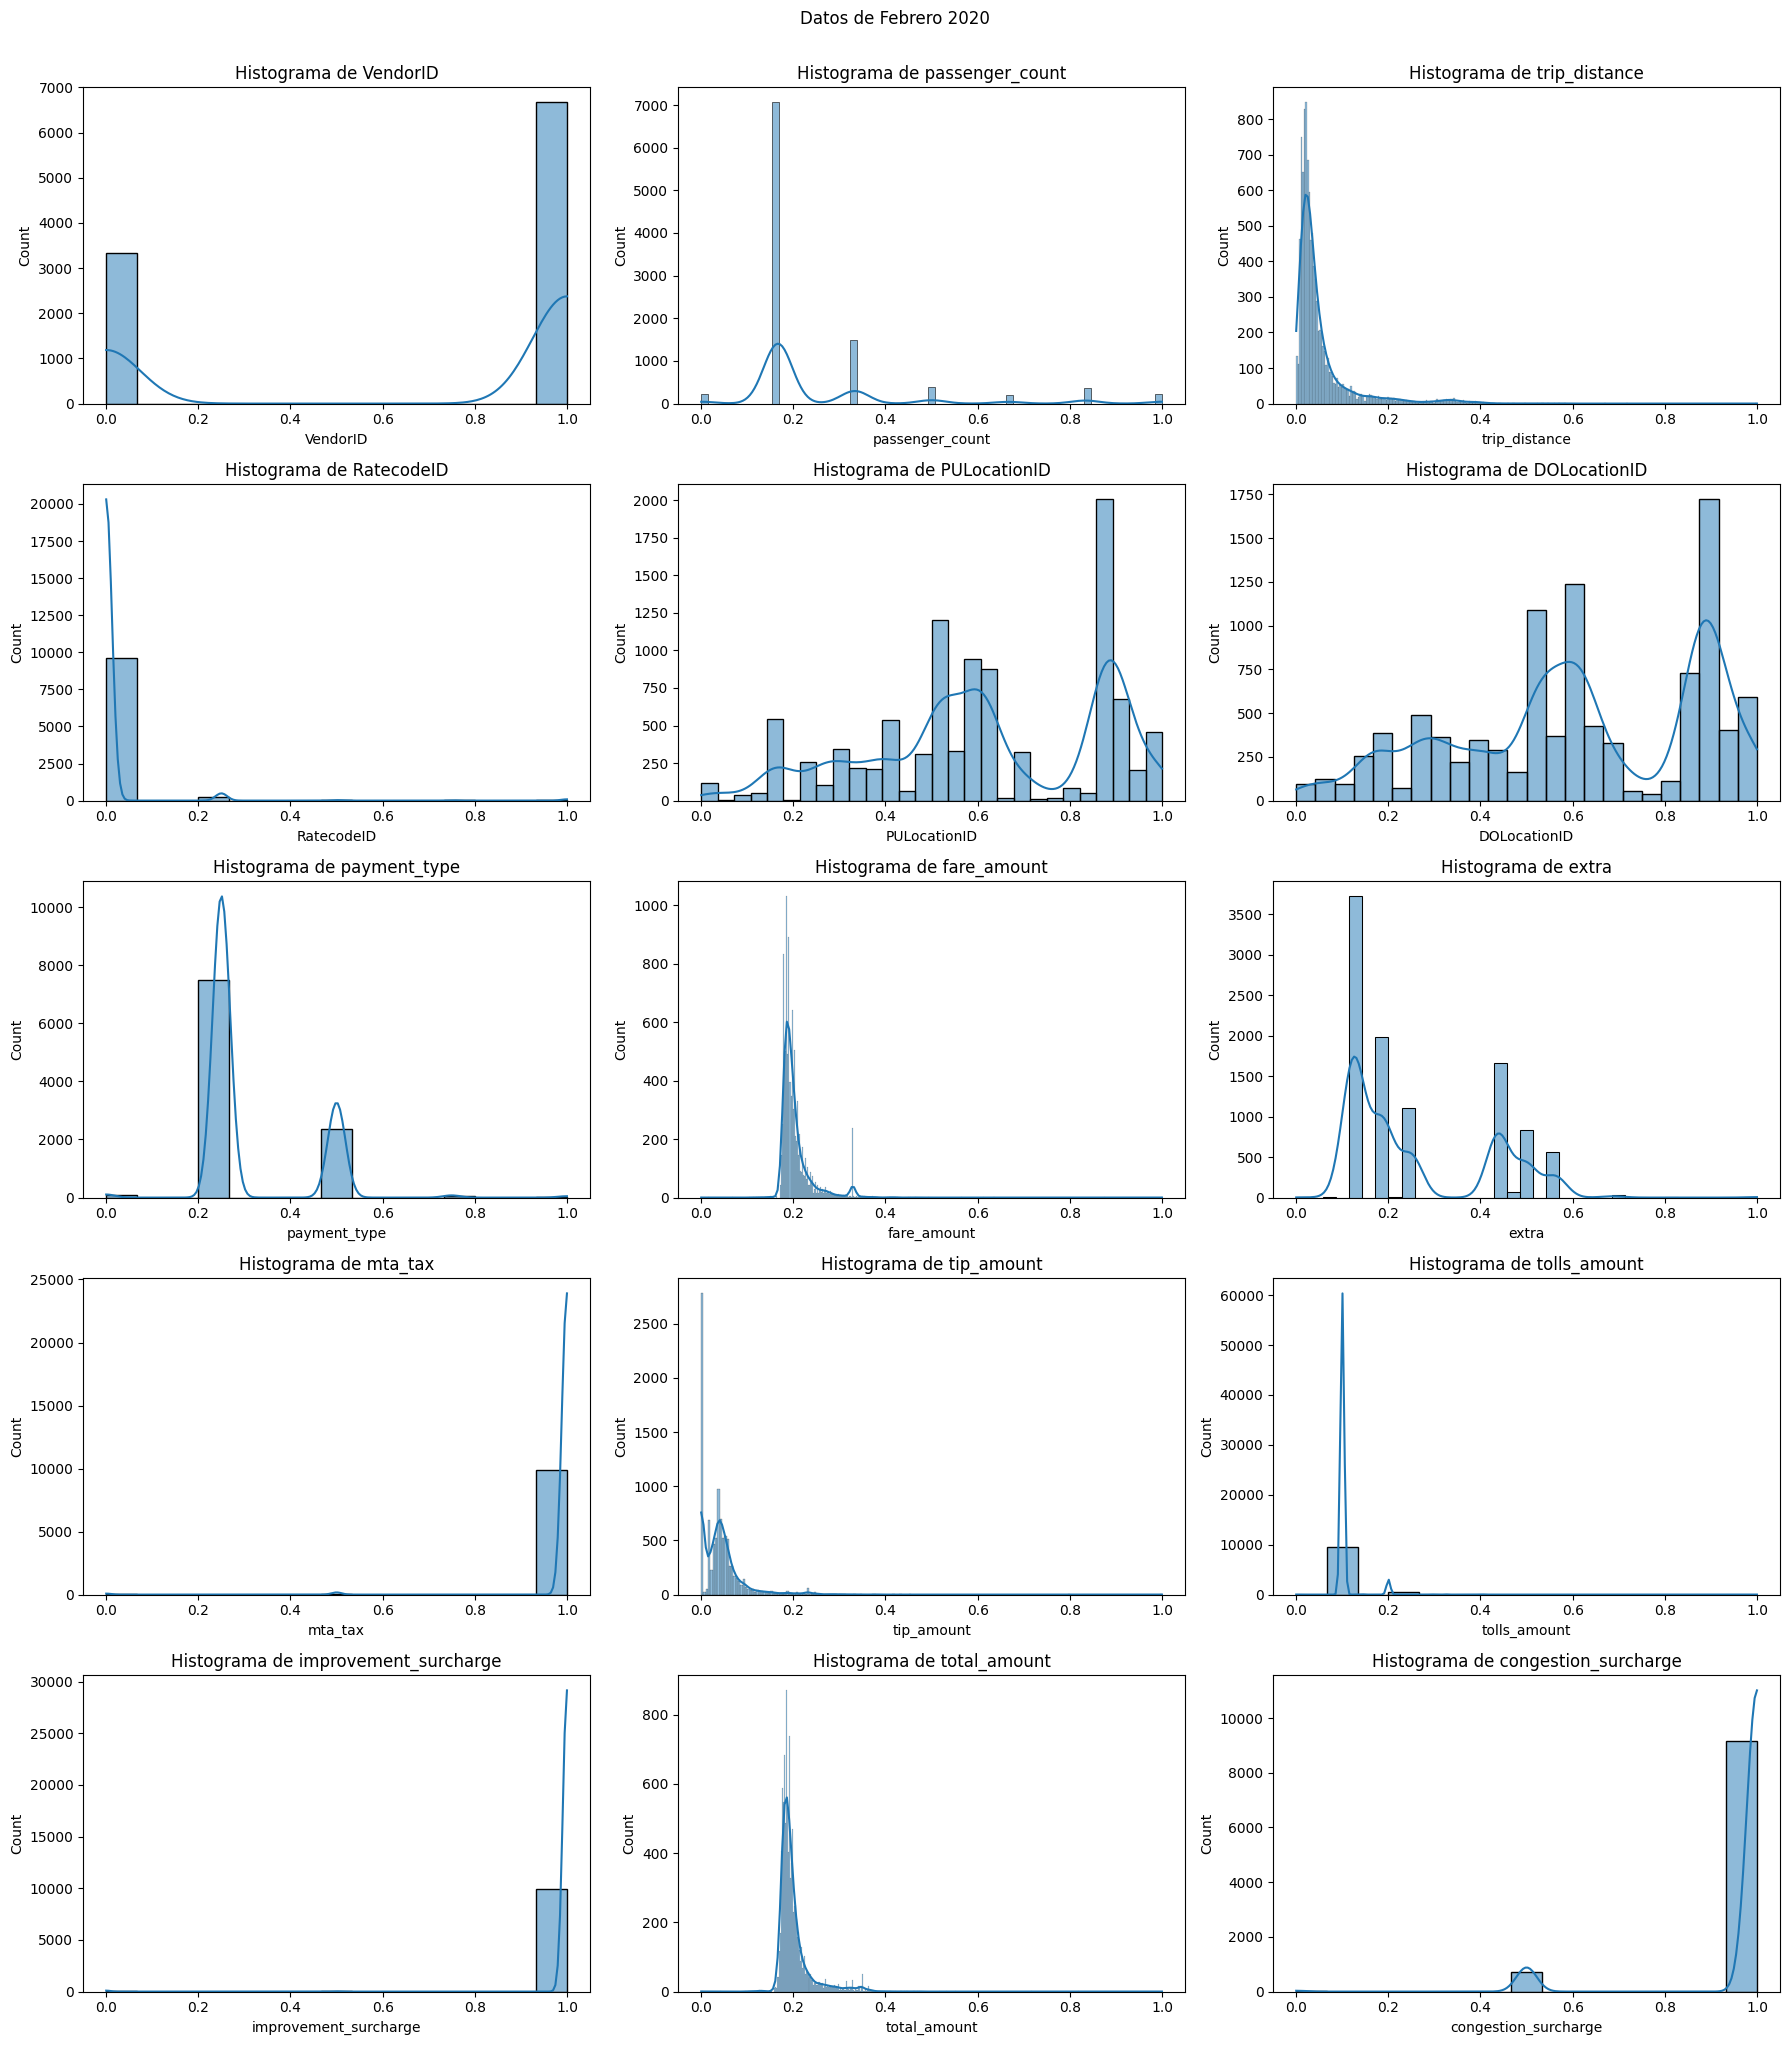

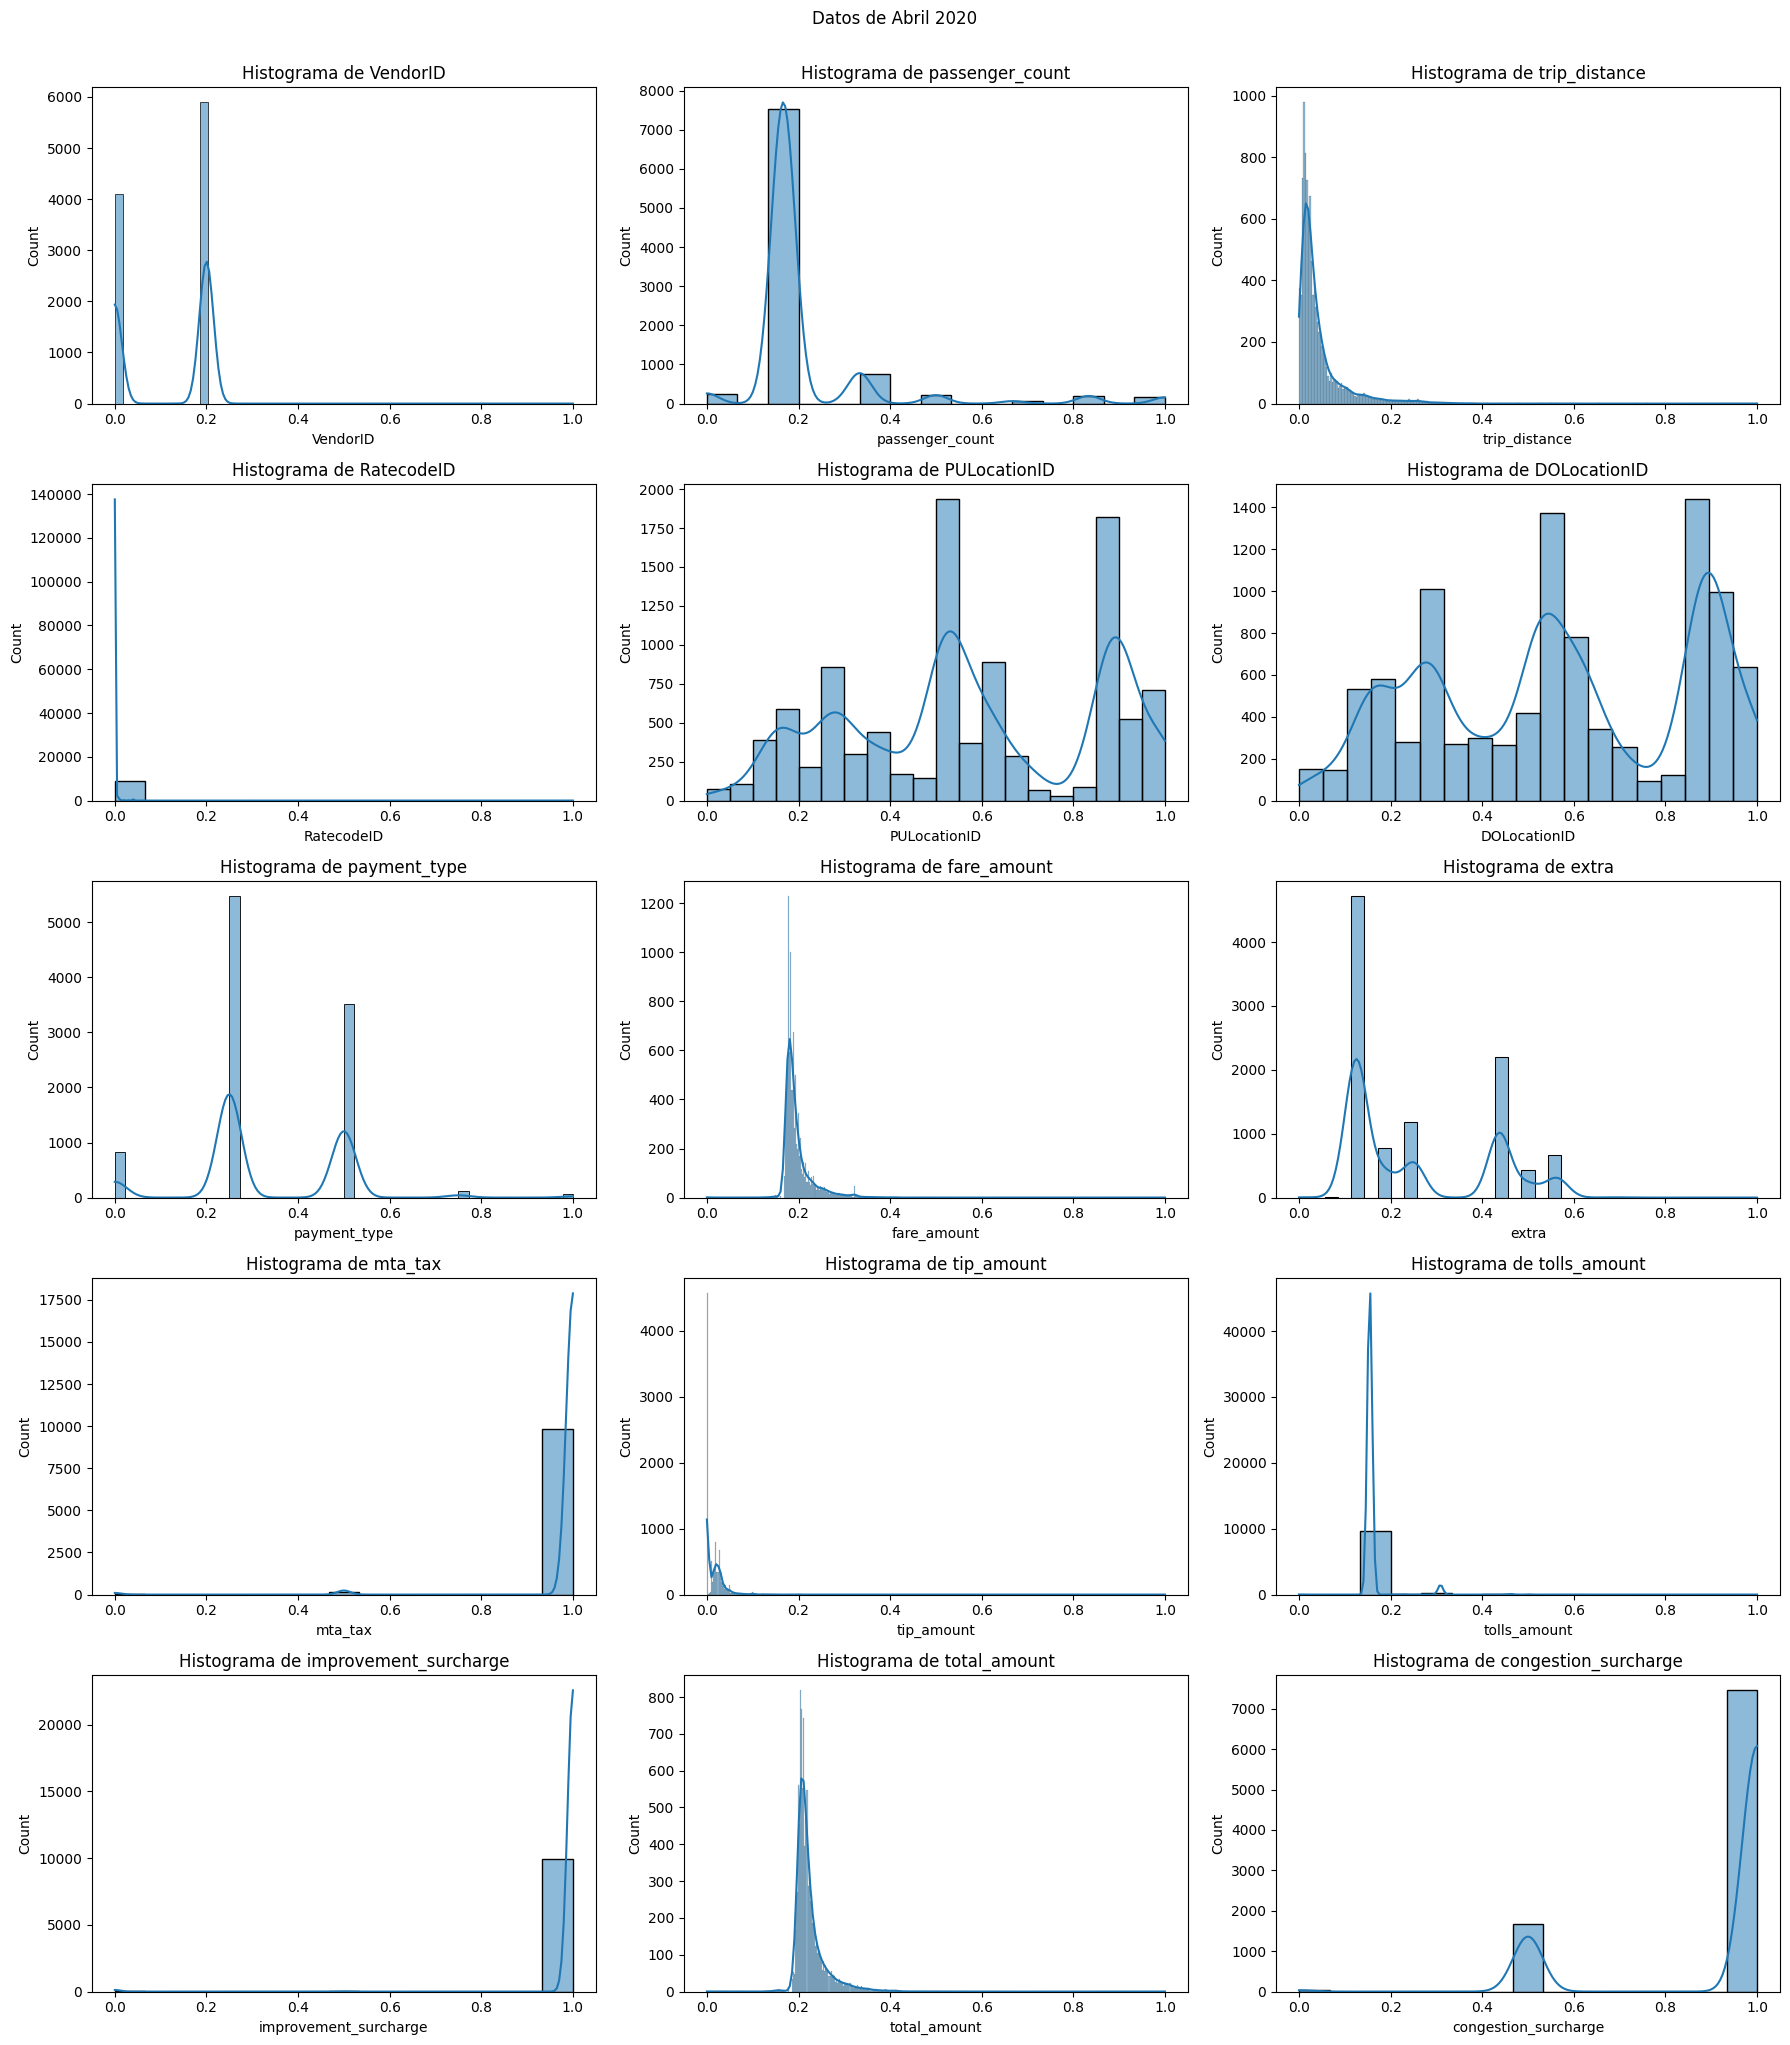

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
def plot_data(df, title):
    df = df.sample(10000)
    # Crear una instancia del escalador Min-Max
    scaler = MinMaxScaler()
    numeric_df = df.select_dtypes(include='number')

    # Ajustar y transformar el DataFrame
    numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

    # Crear gráficos
    num_vars = numeric_df.columns
    n_vars = len(num_vars)
    
    # Determinar el tamaño de la figura en función del número de gráficos
    n_cols = 3  # Número de columnas en los subplots
    n_rows = (n_vars + n_cols - 1) // n_cols  # Calcular el número de filas necesarias

    plt.figure(figsize=(n_cols * 6, n_rows * 4))

    for i, var in enumerate(num_vars):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(numeric_df[var], kde=True)
        plt.title(f'Histograma de {var}')
    
    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Crear visualizaciones para ambos DataFrames
plot_data(taxi_feb, 'Datos de Febrero 2020')
plot_data(taxi_may, 'Datos de Abril 2020')